In [ ]:
PYTHON ETE 
SUBMITTED BY MEGHASHYAM SHIRODKAR 2128403 
 DATA ANALYSIS ON HOTEL BOOKING 

PROBLEM STATEMENT:
The dataset contains booking information for a city hotel and a resort hotel, and includes info such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces. The Hotel industry is a very volatile industry and the bookings depend on above factors and many more.

Objectives:
1. Which Agent made the most bookings.
2) Which type of hotel is mostly prefered by the guests
3) What is the pecentage of cancellation
4) What is the Percentage of repeated guests
5) What is the percentage of booking changes made by the customer

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Set maximum columns to be display in datafram as 36
pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

In [6]:
# import data set
df = pd.read_csv("hotel_bookings.csv")

DATA EXPLORATION

In [7]:
#checking the shape ( rows and column numbers)
print(f' We have total {df.shape[0]} rows and {df.shape[1]} columns.')

 We have total 119390 rows and 32 columns.


In [8]:
# Checking first 5 rows
df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [9]:
# Checking last 5 rows
df.tail(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [10]:
#looking at the min, max values,mean values etc. NAN values for mean,25% ,50%,75%,max indicates those are categorical columns.
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [11]:
#looking for the data types non null entries
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

Data Description:
hotel : Hotel(Resort Hotel or City Hotel)

is_canceled : Value indicating if the booking was canceled (1) or not (0)

lead_time : Number of days that elapsed between the entering date of the booking into the PMS and the arrival date

arrival_date_year : Year of arrival date

arrival_date_month : Month of arrival date

arrival_date_week_number : Week number of year for arrival date

arrival_date_day_of_month : Day of arrival date

stays_in_weekend_nights : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel

stays_in_week_nights : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel

adults : Number of adults

children : Number of children

babies : Number of babies

meal : Type of meal booked. Categories are presented in standard hospitality meal packages:

country : Country of origin.`

market_segment : Market segment designation. In categories, the term “TA” means “Travel Agents” and “TO” means “Tour Operators”

distribution_channel : Booking distribution channel. The term “TA” means “Travel Agents” and “TO” means “Tour Operators”

is_repeated_guest : Value indicating if the booking name was from a repeated guest (1) or not (0)

previous_cancellations : Number of previous bookings that were cancelled by the customer prior to the current booking

previous_bookings_not_canceled : Number of previous bookings not cancelled by the customer prior to the current booking

reserved_room_type : Code of room type reserved. Code is presented instead of designation for anonymity reasons.

assigned_room_type : Code for the type of room assigned to the booking.

booking_changes : Number of changes/amendments made to the booking from the moment the booking was entered on the PMS until the moment of check-in or cancellation

deposit_type : Indication on if the customer made a deposit to guarantee the booking.

agent : ID of the travel agency that made the booking

company : ID of the company/entity that made the booking or responsible for paying the booking.

days_in_waiting_list : Number of days the booking was in the waiting list before it was confirmed to the customer

customer_type : Type of booking, assuming one of four categories

adr : Average Daily Rate as defined by dividing the sum of all lodging transactions by the total number of staying nights

required_car_parking_spaces : Number of car parking spaces required by the customer

total_of_special_requests : Number of special requests made by the customer (e.g. twin bed or high floor)

reservation_status : Reservation last status, assuming one of three categories

Canceled – booking was canceled by the customer
Check-Out – customer has checked in but already departed
No-Show – customer did not check-in and did inform the hotel of the reason why
reservation_status_date : Date at which the last status was set. This variable can be used in conjunction with the ReservationStatus to understand when was the booking canceled or when did the customer checked-out of the hotel

In [12]:
# creating a copy of the dataset
df1=df.copy()

In [13]:
# columns name list
print(list(df1.columns))

['hotel', 'is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'reserved_room_type', 'assigned_room_type', 'booking_changes', 'deposit_type', 'agent', 'company', 'days_in_waiting_list', 'customer_type', 'adr', 'required_car_parking_spaces', 'total_of_special_requests', 'reservation_status', 'reservation_status_date']


In [15]:
# converting object type to datetime
df1['reservation_status_date'] = pd.to_datetime(df1['reservation_status_date'], format = '%Y-%m-%d')

Data Cleaning

In [16]:
# checking for the duplicate rows
df1.duplicated().value_counts()    #true means duplicate rows

False    87396
True     31994
dtype: int64

<AxesSubplot:ylabel='count'>

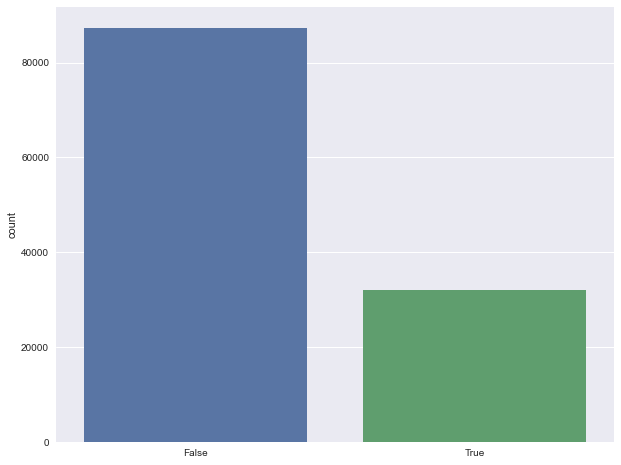

In [17]:
# Visulizing through Count pot
plt.figure(figsize=(10,8))
sns.countplot(x=df1.duplicated())

In [18]:
#So we have 31994 duplicate rows in our data. So we will drop the duplicate rows from our data

In [19]:
#dropping the duplicate rows
df1= df1.drop_duplicates()

In [20]:
# data set reduced
df1.shape

(87396, 32)

In [21]:
#checking for Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,company,82137
1,agent,12193
2,country,452
3,children,4
4,reserved_room_type,0
5,assigned_room_type,0


Text(0.5, 1.0, 'Places of missing values in column')

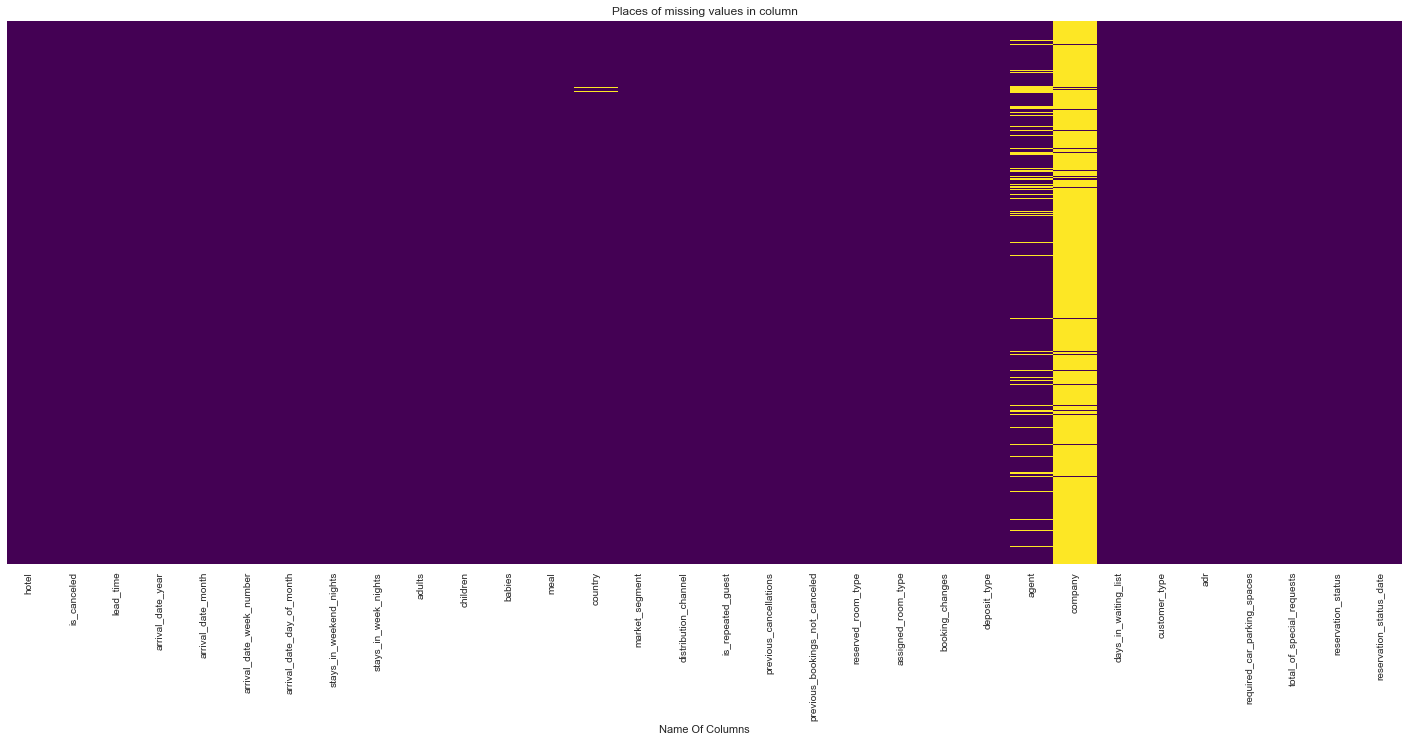

In [22]:
# Visulaizing null values through heatmap.
plt.figure(figsize=(25, 10))
sns.heatmap(df1.isnull(), cbar=False, yticklabels=False,cmap='viridis')
plt.xlabel("Name Of Columns")
plt.title("Places of missing values in column")

So we Have Null values in columns- Company, agent, Country,children.

for company and agent I will fill the Missing values with 0
for country I will fill Missing values with boject 'Others'. ( assuming while collecting data country was not found so user selected the 'Others' option.)
AS the count of missing values in Children Column is only 4, so we can replace with 0 considering no childrens.

In [25]:
# Filling/replacing null values with 0.
null_columns=['agent','children','company']
for col in null_columns:
  df1[col].fillna(0,inplace=True)

# Replacing NA values with 'others'
df1['country'].fillna('others',inplace=True)

In [26]:
#Successfully handled  Null Values
df1.isna().sum().sort_values(ascending=False)[:6].reset_index().rename(columns={'index':'Columns',0:'Null values'})

,Columns,Null values
0,hotel,0
1,is_canceled,0
2,reservation_status,0
3,total_of_special_requests,0
4,required_car_parking_spaces,0
5,adr,0


In [28]:
# droppping all 166 those rows in which addtion of of adlults ,children and babies is 0. That simply means  no bookings were made.
len(df1[df1['adults']+df1['babies']+df1['children']==0])
df1.drop(df1[df1['adults']+df1['babies']+df1['children']==0].index,inplace=True)

In [29]:
# Checking the unique values in categorical columns.
categorical_cols=list(set(df1.drop(columns=['reservation_status_date','country','arrival_date_month']).columns)-set(df1.describe()))
for col in categorical_cols:
  print(f'Unique values in column {col} are:, {(df1[col].unique())}')

Unique values in column market_segment are:, ['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']
Unique values in column deposit_type are:, ['No Deposit' 'Refundable' 'Non Refund']
Unique values in column meal are:, ['BB' 'FB' 'HB' 'SC' 'Undefined']
Unique values in column assigned_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'I' 'B' 'H' 'L' 'K']
Unique values in column customer_type are:, ['Transient' 'Contract' 'Transient-Party' 'Group']
Unique values in column distribution_channel are:, ['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']
Unique values in column hotel are:, ['Resort Hotel' 'City Hotel']
Unique values in column reservation_status are:, ['Check-Out' 'Canceled' 'No-Show']
Unique values in column reserved_room_type are:, ['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'B']


In [30]:
# lets add some new columns

df1['total_people'] = df1['adults'] + df1['babies'] + df1['children']   
df1['total_stay'] = df1['stays_in_weekend_nights'] + df1['stays_in_week_nights']

In [31]:
# Checking the final rows and columns
df1.shape

(87230, 34)

EDA (Exploratory Data Analysis)

1) Which type of hotel is mostly prefered by the guests

Text(0.5, 1.0, 'Pie Chart for Most Preffered  Hotel')

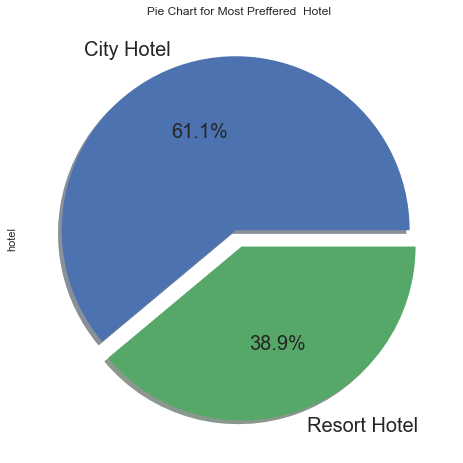

In [32]:
# Visualizsing the by pie chart.
df1['hotel'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)   
plt.title('Pie Chart for Most Preffered  Hotel')

In [34]:
#Observation
#City Hotel is most preffered hotel by guests. Thus city hotels has maximum bookings

2) Which Agent made the most bookings

In [35]:
# return highest bookings made by agents
highest_bookings= df1.groupby(['agent'])['agent'].agg({'count'}).reset_index().rename(columns={'count': "Most_Bookings" }).sort_values(by='Most_Bookings',ascending=False)

 # as agent 0 was NAN value and we replaced it with 0 and indicates no bookings.so droping.
highest_bookings.drop(highest_bookings[highest_bookings['agent']==0].index,inplace=True) 

# taking top 10 bookings made by agent
top_ten_highest_bookings=highest_bookings[:10]

top_ten_highest_bookings

,agent,Most_Bookings
9,9.0,28721
174,240.0,13028
14,14.0,3342
7,7.0,3294
183,250.0,2779
175,241.0,1644
27,28.0,1493
8,8.0,1383
1,1.0,1228
6,6.0,1117


Text(0.5, 1.0, 'Most Bookings Made by the agent')

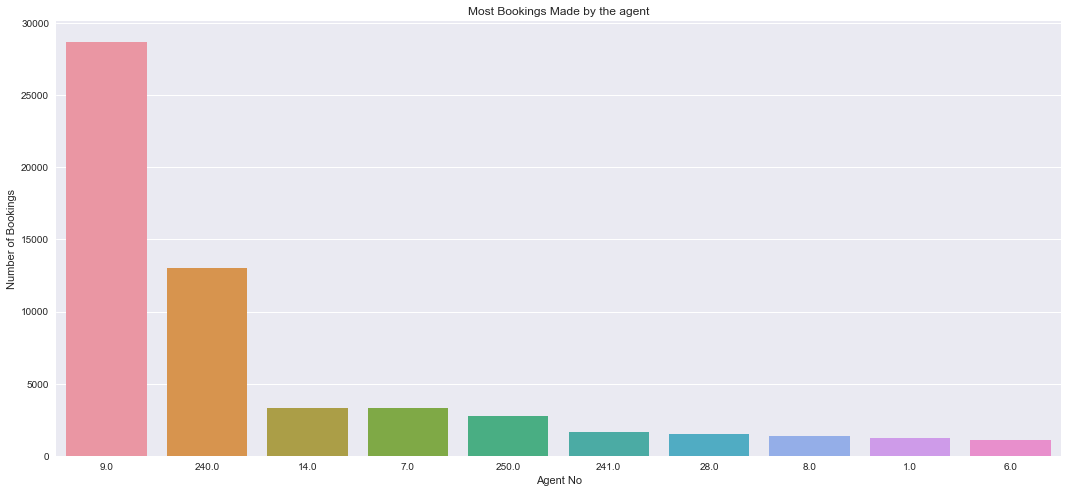

In [36]:
#Visualizaing the graph

plt.figure(figsize=(18,8))
sns.barplot(x=top_ten_highest_bookings['agent'],y=top_ten_highest_bookings['Most_Bookings'],order=top_ten_highest_bookings['agent'])
plt.xlabel('Agent No')
plt.ylabel('Number of Bookings')
plt.title("Most Bookings Made by the agent")

In [37]:
#Observation
#Agent ID no: 9 made most of the bookings

3)What is the pecentage of cancellation?

Text(0.5, 1.0, 'Cancellation and non Cancellation')

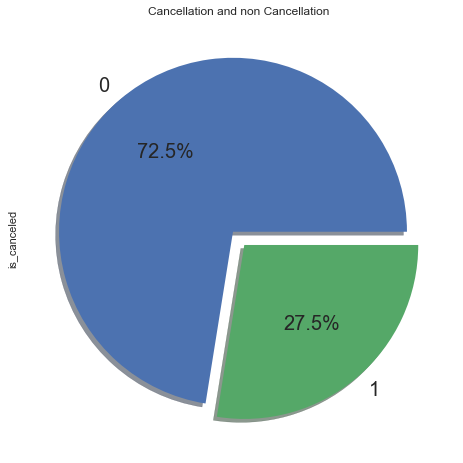

In [38]:
df1['is_canceled'].value_counts().plot.pie(explode=[0.05, 0.05], autopct='%1.1f%%', shadow=True, figsize=(10,8),fontsize=20)
plt.title("Cancellation and non Cancellation")

Observation :
0= not cancled
1= canceled
27.5 % of the bookings were cancelled.

4) What is the Percentage of repeated guests?

Text(0.5, 1.0, ' Percentgae (%) of repeated guests')

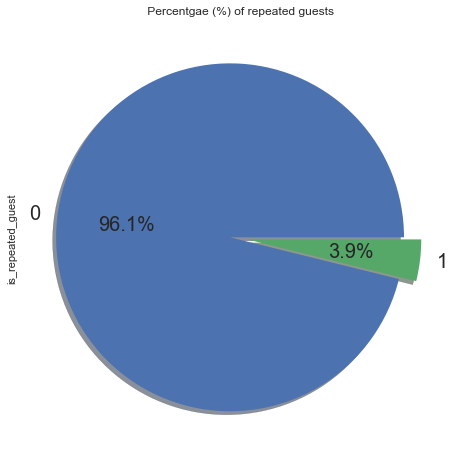

In [39]:
df1['is_repeated_guest'].value_counts().plot.pie(explode=(0.05,0.05),autopct='%1.1f%%',shadow=True,figsize=(12,8),fontsize=20)

plt.title(" Percentage (%) of repeated guests")

5)What is the percentage of booking changes made by the customer.?

Text(0, 0.5, 'Percentage(%)')

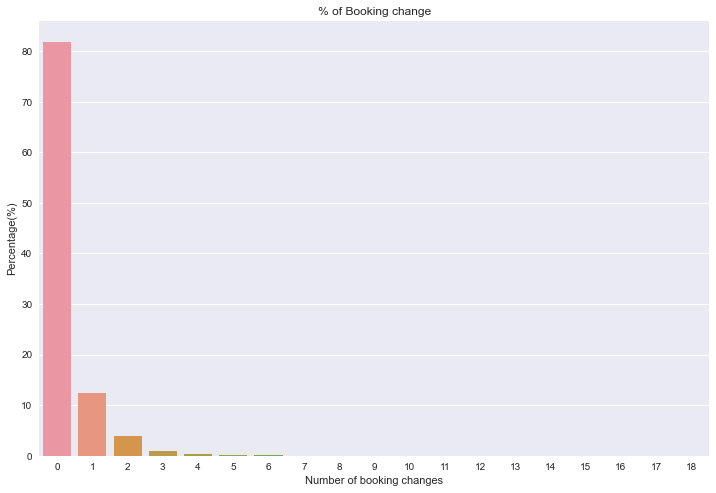

In [40]:
booking_changes_df=df1['booking_changes'].value_counts().reset_index().rename(columns={'index': "number_booking_changes",'booking_changes':'Counts'})

plt.figure(figsize=(12,8))
sns.barplot(x=booking_changes_df['number_booking_changes'],y=booking_changes_df['Counts']*100/df1.shape[0])
plt.title("% of Booking change")
plt.xlabel('Number of booking changes')
plt.ylabel('Percentage(%)')

CONCLUSIONS:
    City hotels are the most preferred hotel type by the guests. We can say City hotel is the busiest hotel.
27.5 % bookings were got cancelled out of all the bookings.
Only 3.9 % people were revisited the hotels. Rest 96.1 % were new guests. Thus retention rate is low.
The percentage of 0 changes made in the booking was more than 82 %. Percentage of Single changes made was about 10%.

In [ ]:
Recommendations:
   1 therefore city hotels should look after the customer needs and should accordingly manage the prices for the room.
   2 should also focus on competitors and should provide offers to their customer.